# DLProfile Example using CANDLE Application

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:
#import shutil
#shutil.rmtree('/tmp/temp_analysis')

In [7]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/candel/candel_run2_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

Loaded Pre-processed DXT DF from file: /tmp/temp_analysis/candel_run2_p8_io_dxt_df.csv
Loaded Pre-processed DF from file: /tmp/temp_analysis/candel_run2_p8_io_df.csv
Loaded Pre-processed Pattern file: /tmp/temp_analysis/candel_run2_p8_pattern.json
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [8]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/nt3_default_model.txt',
 '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/common/../Data/Pilot1/nt_train2.csv',
 '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/common/../Data/Pilot1/nt_test2.csv',
 '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/training.log',
 '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/run.RUN000.json']


### Collect the summary of the Application

In [9]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	2776.00 seconds
Time spent in I/O		:	2.33 seconds
% Time spent in I/O		:	0.08%
Total Data Accessed		:	5.83 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read' 'write']
# of files used			:	5
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 262144 bytes
	Average			:	260997 bytes
	Median			:	262144 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 625 MB/s
	Average			:	342 MB/s
	Median			:	357 MB/s
Access Pattern:
	Sequential		:	99.87%
	Consecutive		:	99.86%


Files Summary:
File Types			:	['txt' 'csv' 'log' 'json']
Dataset Size:
	Total			:	0.729 GB
	Min,Max			:	0.000 GB and 0.583 GB
	Average			:	0.146 GB


In [10]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 2776.0 seconds'


In [11]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 2.328862500000218 seconds'


### I/O time spent on each file

In [12]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/nt3_default_model.txt: 0.01 seconds
I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/common/../Data/Pilot1/nt_train2.csv: 1.93 seconds
I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/common/../Data/Pilot1/nt_test2.csv: 0.37 seconds
I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/training.log: 0.00 seconds
I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/run.RUN000.json: 0.01 seconds


### I/O Time spent per rank

In [13]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 2.29 seconds
I/O time for rank 1: 2.53 seconds
I/O time for rank 2: 2.20 seconds
I/O time for rank 3: 2.19 seconds
I/O time for rank 4: 2.22 seconds
I/O time for rank 5: 2.25 seconds
I/O time for rank 6: 2.64 seconds
I/O time for rank 7: 2.31 seconds


In [14]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 5.83 GB'

### I/O performed on each file

In [15]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/nt3_default_model.txt: 0.00 MB
I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/common/../Data/Pilot1/nt_train2.csv: 4774.60 MB
I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/common/../Data/Pilot1/nt_test2.csv: 1194.89 MB
I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/training.log: 0.00 MB
I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/run.RUN000.json: 0.00 MB


In [16]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 746.19 MB
I/O performed by rank 1: 746.19 MB
I/O performed by rank 2: 746.19 MB
I/O performed by rank 3: 746.19 MB
I/O performed by rank 4: 746.19 MB
I/O performed by rank 5: 746.19 MB
I/O performed by rank 6: 746.19 MB
I/O performed by rank 7: 746.19 MB


In [17]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'nt3_default_model': 397.0,
 'nt_test2': 156616161.0,
 'nt_train2': 625815725.0,
 'run.RUN000': 47716.0,
 'training': 593.0}


### How application access data over time.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df.csv


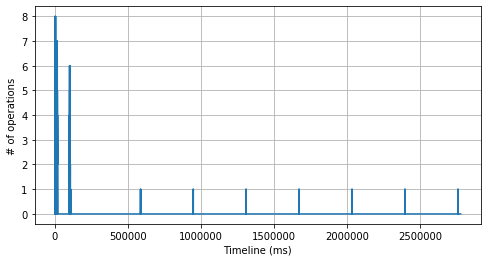

In [18]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("# of operations")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['operation_count']);

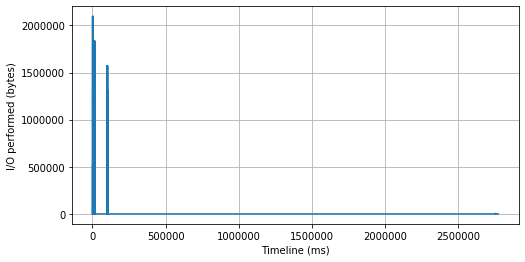

In [19]:
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("I/O performed (bytes)")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_nt3_default_model.csv


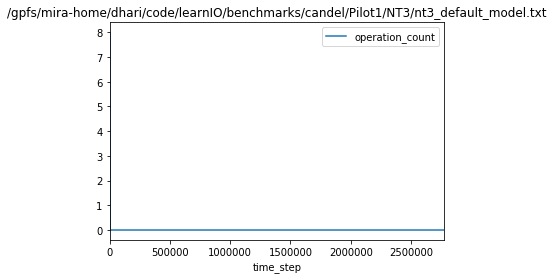

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_nt_train2.csv


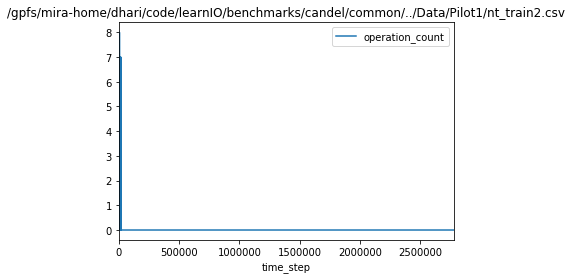

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_nt_test2.csv


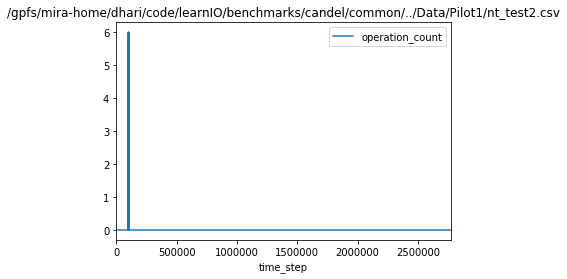

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_training.csv


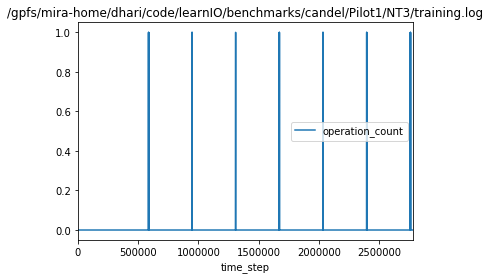

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_run.RUN000.csv


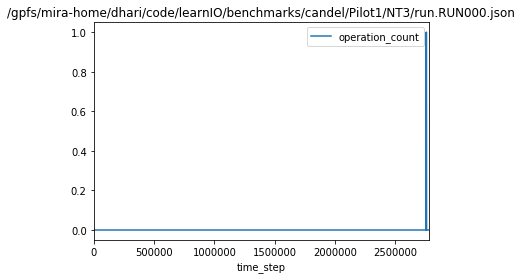

In [20]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_0.csv


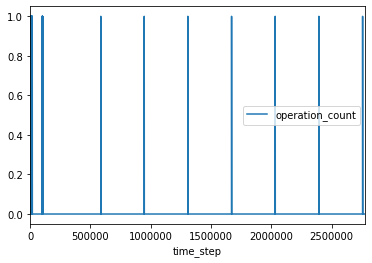

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_1.csv


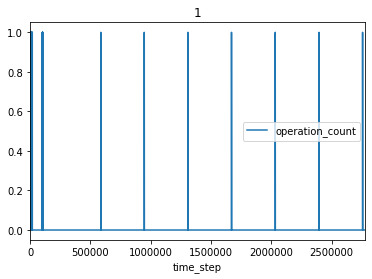

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_2.csv


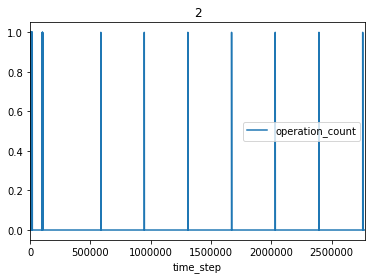

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_3.csv


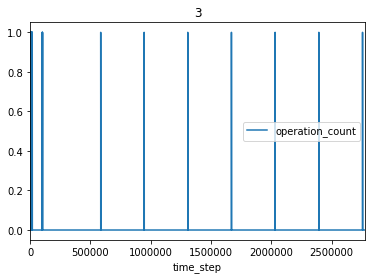

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_4.csv


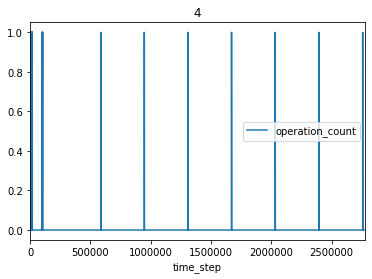

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_5.csv


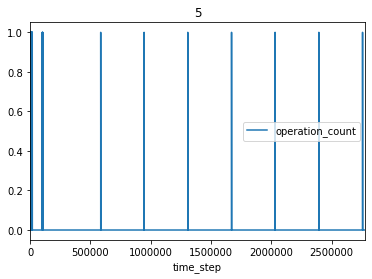

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_6.csv


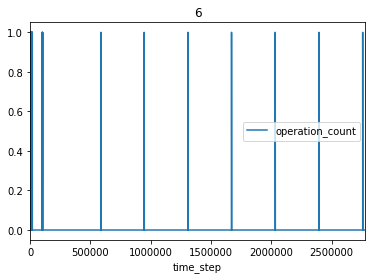

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/candel_run2_p8_tm_df_7.csv


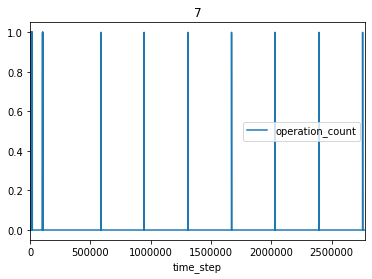

In [21]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

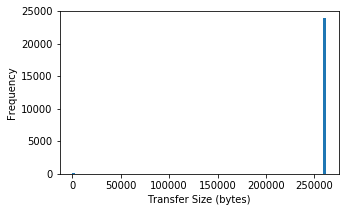

In [22]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3), bins=100);
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

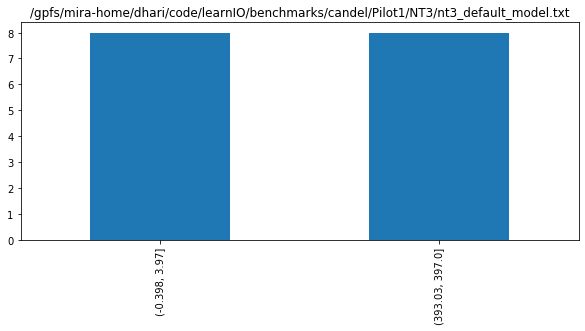

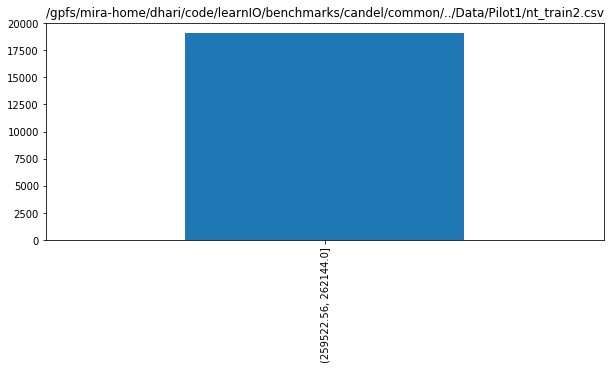

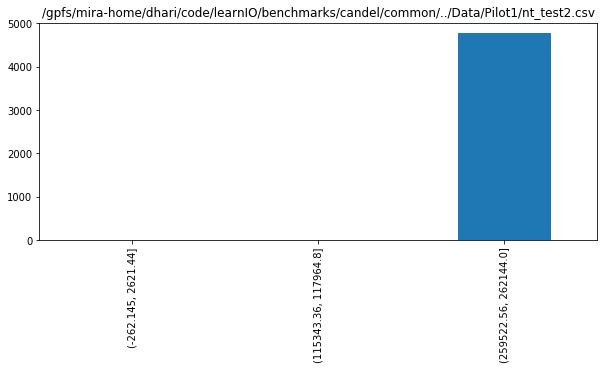

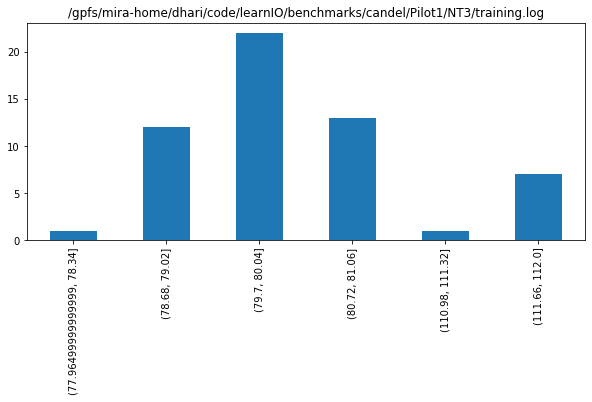

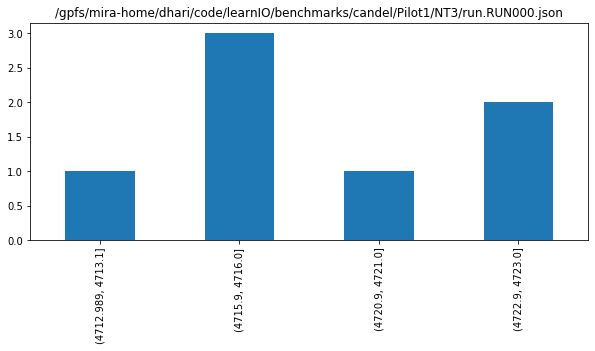

In [23]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

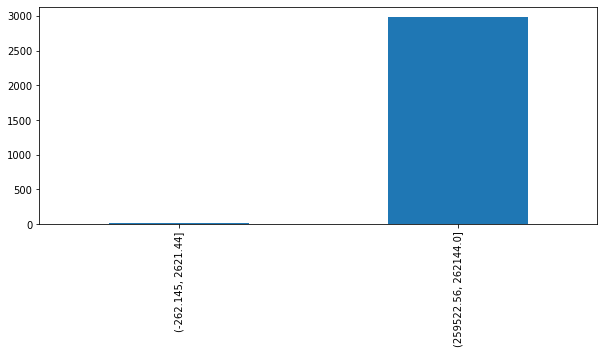

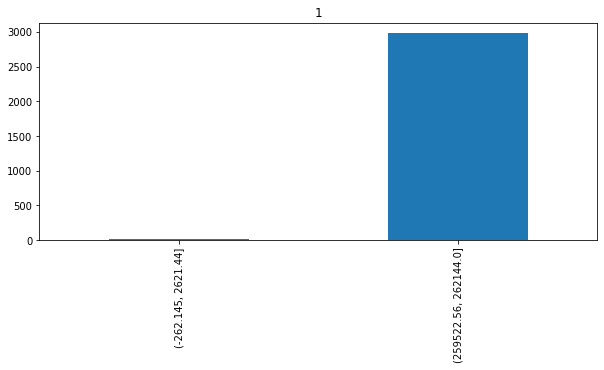

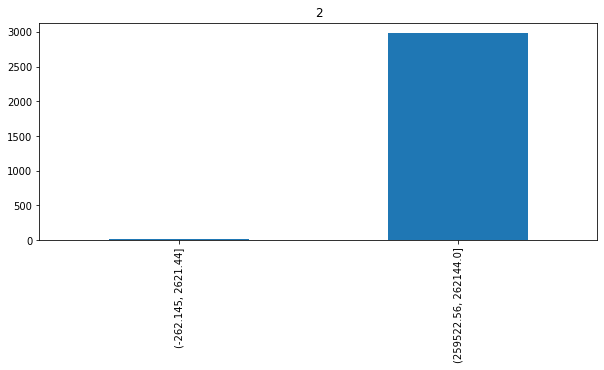

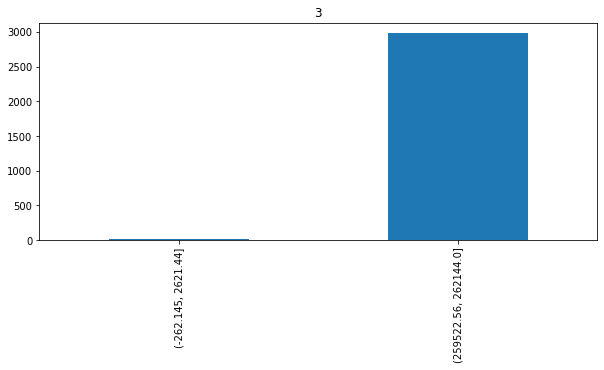

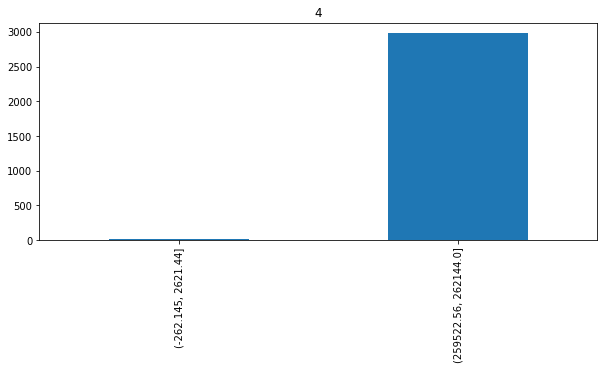

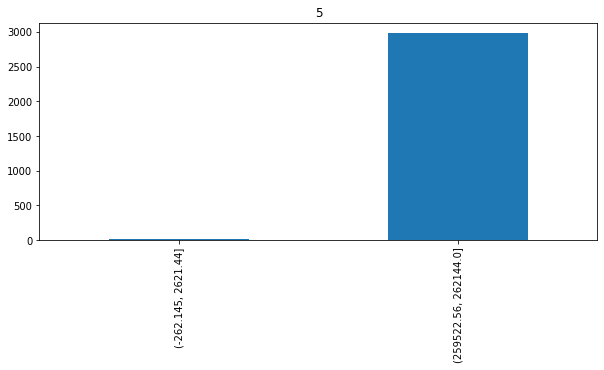

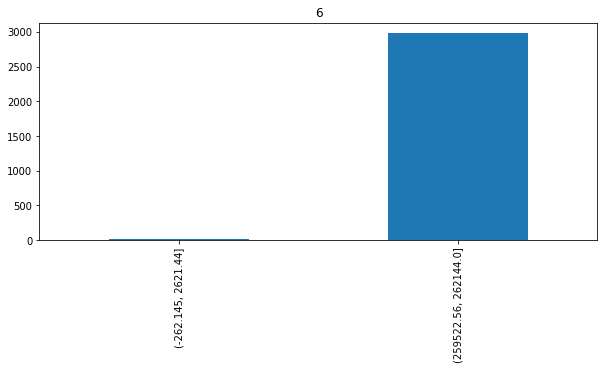

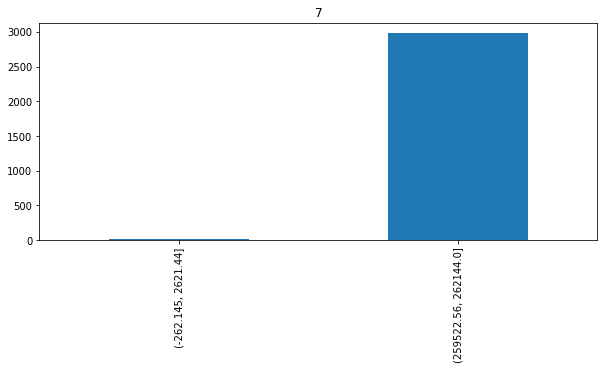

In [24]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [25]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    pp.pprint(profile.GetFileSummary(file))

{'ext': 'txt',
 'filename': 'nt3_default_model',
 'io_size': 3176,
 'io_time': 0.014012500000000032,
 'path': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/nt3_default_model.txt',
 'size': 397,
 'special': {}}
{'ext': 'csv',
 'filename': 'nt_train2',
 'io_size': 5006525800,
 'io_time': 1.9305499999999802,
 'path': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/common/../Data/Pilot1/nt_train2.csv',
 'size': 625815725,
 'special': {}}
{'ext': 'csv',
 'filename': 'nt_test2',
 'io_size': 1252929288,
 'io_time': 0.369500000000059,
 'path': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/common/../Data/Pilot1/nt_test2.csv',
 'size': 156616161,
 'special': {}}
{'ext': 'log',
 'filename': 'training',
 'io_size': 4734,
 'io_time': 0.0028125000000898126,
 'path': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/training.log',
 'size': 593,
 'special': {}}
{'ext': 'json',
 'filename': 'run.RUN000',
 'io_size': 4723,
 'io_time': 0.013700000000101551,

In [26]:
profile.CreateChromeTimeline(location="/home/dhari/timeline/apps/candel", filename="candel_run2_p8.json")

[============================================================] 100.0% 23983 of 23983 Creating Timeline 


{'traceEvents': [{'name': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/nt3_default_model.txt',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 362600,
   'pid': 3,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/nt3_default_model.txt',
    'Rank': 3,
    'Operation': 'read',
    'Segment': 0,
    'Offset': 0,
    'Length': 397,
    'Start': 0.3626,
    'End': 0.3764}},
  {'name': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/nt3_default_model.txt',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 362700,
   'pid': 2,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/nt3_default_model.txt',
    'Rank': 2,
    'Operation': 'read',
    'Segment': 0,
    'Offset': 0,
    'Length': 397,
    'Start': 0.3627,
    'End': 0.3764}},
  {'name': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/candel/Pilot1/NT3/nt3_d